# Importing Libraries and Data

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(r'G:\Projects\Data Analytics\netflix-analysis\netflix_titles.csv')


# Get a quick overview of the dataset

In [43]:
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


# Looking for Null Values

In [24]:
for column in df.columns:
    print(f"Column: {column}")
    print(f"Unique values: {df[column].nunique()}")
    print(f"Missing values: {df[column].isnull().sum()}")
    print(f"Data type: {df[column].dtype}")
    print("-" * 40)

Column: show_id
Unique values: 8807
Missing values: 0
Data type: object
----------------------------------------
Column: type
Unique values: 2
Missing values: 0
Data type: object
----------------------------------------
Column: title
Unique values: 8807
Missing values: 0
Data type: object
----------------------------------------
Column: director
Unique values: 4528
Missing values: 2634
Data type: object
----------------------------------------
Column: cast
Unique values: 7692
Missing values: 825
Data type: object
----------------------------------------
Column: country
Unique values: 748
Missing values: 831
Data type: object
----------------------------------------
Column: date_added
Unique values: 1767
Missing values: 10
Data type: object
----------------------------------------
Column: release_year
Unique values: 74
Missing values: 0
Data type: int64
----------------------------------------
Column: rating
Unique values: 17
Missing values: 4
Data type: object
-------------------------

# Removing Null Date and Country Columns

In [25]:
df.dropna(subset=['date_added', 'country'], inplace=True)

# Converting date_added column 


The date_added column is object type so it will be converted to date type for betterment.

In [26]:
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), format='mixed', errors='coerce')

# 📈 How many movies vs TV shows are on Netflix?

<Axes: title={'center': 'Movies vs TV Shows on Netflix'}, xlabel='Type', ylabel='Number of Titles'>

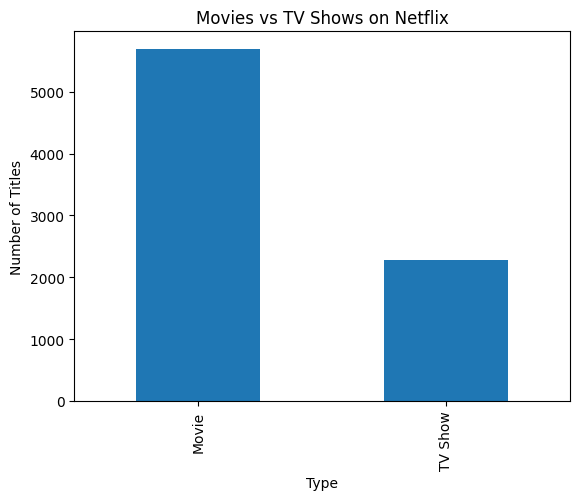

In [35]:
type_counts = df['type'].value_counts()
type_counts.plot(kind='bar', title='Movies vs TV Shows on Netflix', ylabel='Number of Titles', xlabel='Type')

# 🌍 What are the top countries producing content on Netflix?

<Axes: title={'center': 'Top 10 Countries Producing Content on Netflix'}, xlabel='Country', ylabel='Number of Titles'>

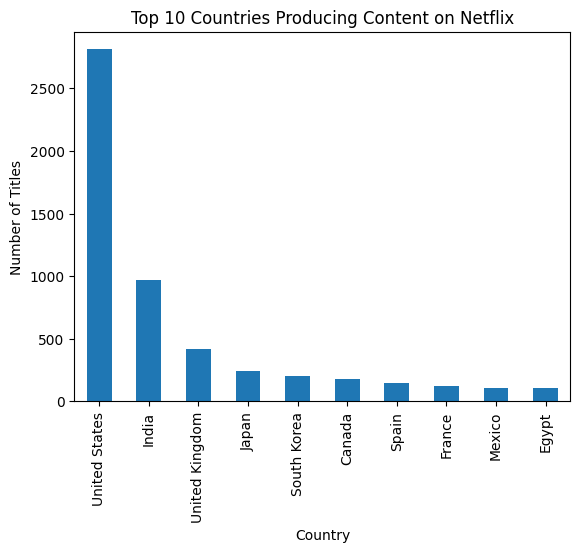

In [28]:
# Count the number of titles produced by each country
country_counts = df['country'].value_counts().head(10)
country_counts.plot(kind='bar', title='Top 10 Countries Producing Content on Netflix', ylabel='Number of Titles', xlabel='Country')

# 📅 What’s the trend of content released per year?

<Axes: title={'center': 'Trend of Content Released per Year'}, xlabel='Release Year', ylabel='Number of Titles'>

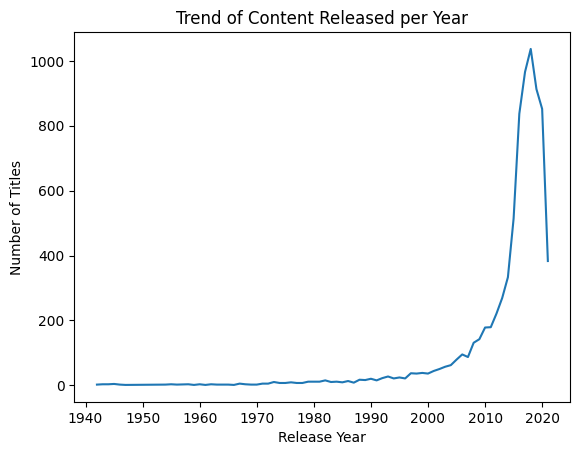

In [29]:
# Count the number of titles released each year
release_trend = df['release_year'].value_counts().sort_index()
release_trend.plot(kind='line', title='Trend of Content Released per Year', ylabel='Number of Titles', xlabel='Release Year')

# 🔞 What are the most common ratings (PG, R, etc)?

<Axes: title={'center': 'Most Common Ratings on Netflix'}, xlabel='Rating', ylabel='Number of Titles'>

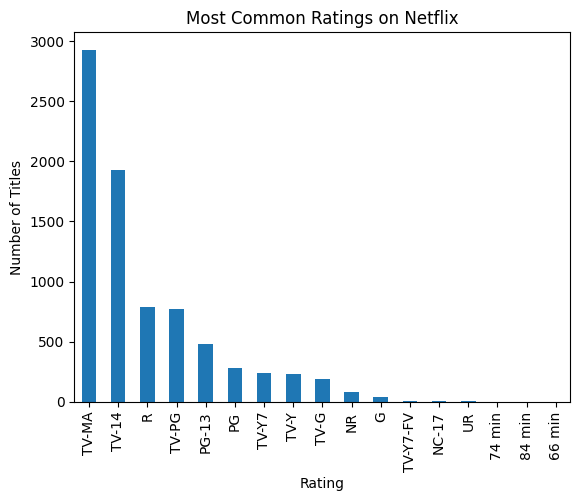

In [30]:
# Display the most common ratings
df['rating'].value_counts().plot(kind='bar', title='Most Common Ratings on Netflix', ylabel='Number of Titles', xlabel='Rating')

# 🎭 What genres are most common?

<Axes: title={'center': 'Top 10 Most Common Genres on Netflix'}, xlabel='Genre', ylabel='Number of Titles'>

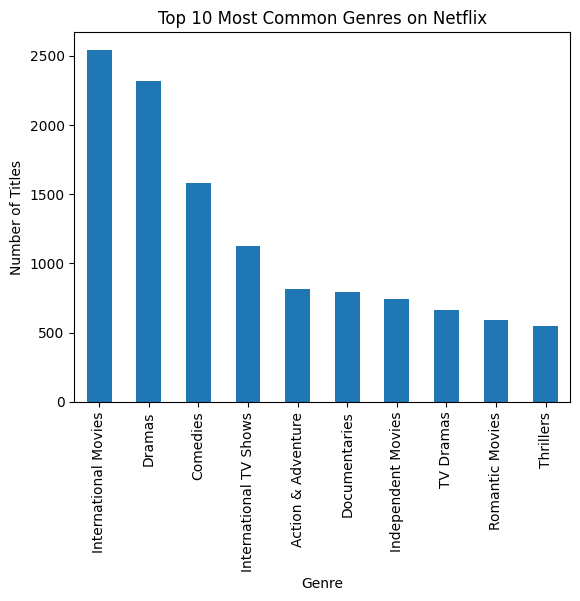

In [31]:
# Split the 'listed_in' column by comma, stack, and count the most common genres
genre_counts = df['listed_in'].str.split(',').explode().str.strip().value_counts()
genre_counts.head(10).plot(kind='bar', title='Top 10 Most Common Genres on Netflix', ylabel='Number of Titles', xlabel='Genre')


# 🕰️ Which months have more releases?

<Axes: title={'center': 'Number of Releases by Month'}, xlabel='Month', ylabel='Number of Titles'>

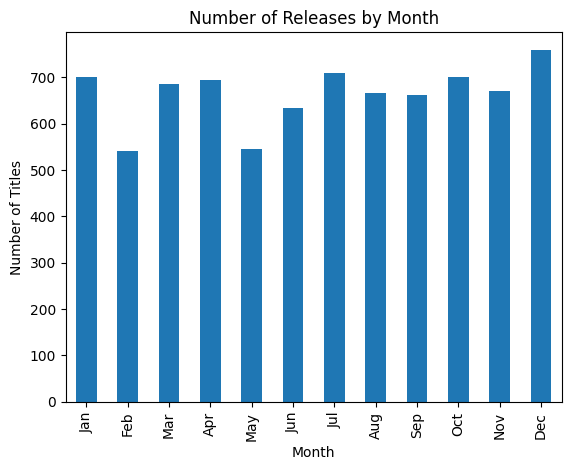

In [33]:
# Count the number of titles added in each month across all years
month_counts = df['month_added'].value_counts().sort_index()
month_counts.index = month_counts.index.map({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})
month_counts.plot(kind='bar', title='Number of Releases by Month', ylabel='Number of Titles', xlabel='Month')